## 第3章 分類問題 - 機械学習ライブラリ scikit-learn の活用

### 3.1 分類アルゴリズムの選択

解析したい対象、解きたい問題に対して、適切な分類アルゴリズムを選ぶ必要がある。

**重要な原則 「ノーフリーランチ」定理**

あらゆる問題に対して、最適な分類を行なってくれる唯一の完璧なモデル、というものは無い。

つまり、個々の問題に対して適切なモデルを選択・構築する必要がある。

機械学習アルゴリズムのトレーニングは以下の流れで行なわれる。

1. 特徴量を選択する
2. 性能指標を選択する
3. 分類器と最適化アルゴリズムを選択する  → この章の主題
4. モデルの性能を評価する
5. アルゴリズムを調整する

第3章では様々な分類アルゴリズムをscikit-learnを使って紹介してく。

1、2、4、5については後の章でやる(らしい)

### 前準備

In [148]:
%config InlineBackend.figure_formats = {'png', 'retina'}
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [149]:
print("Class labels:", np.unique(y))

Class labels: [0 1 2]


In [153]:
#from sklearn.cross_validation import train_test_split
# sklern.cross_validation は deprecatedになっているのでmodel_selectionを使う
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# test_size = 0.3 なので全データの3割をテスト用データ、7割を学習用データとして分割している

In [4]:
from sklearn.preprocessing import StandardScaler
# StandardScaler というクラスを使って、特徴量を標準化している
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [126]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_train_std.shape, X_test_std.shape)

(105, 2) (105,) (45, 2) (45,) (105, 2) (45, 2)


### パーセプトロン

In [6]:
from sklearn.linear_model import Perceptron

#  Perceptron クラスのインスタンスを作成、eta0 は学習率
# scikit-learn の バージョンが書籍よりも新しいからか Perceptron の引数の n_iter は max_iter に置き換わっている
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0, shuffle=True)

# fit メソッドを使って学習
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [7]:
# predict メソッドを使ってテストデータの検証
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


In [8]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
# 予測の精度は 91% 

Accuracy: 0.91


In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [11]:
# 決定境界を図示する為の関数
# 詳細は省略
def plot_desction_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() +1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
        
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidths=1, marker='o', s=55, label='test set')
                    
    

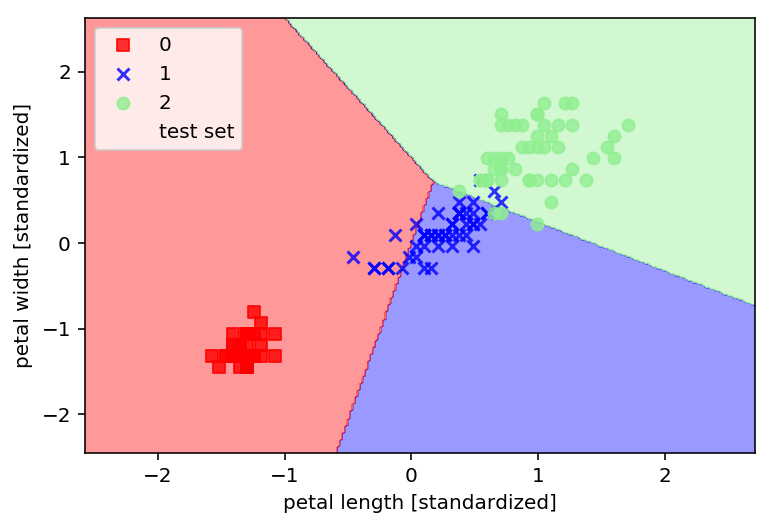

In [12]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_desction_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

### 3.3 ロジスティック回帰

参考URL

http://tkengo.github.io/blog/2016/06/16/yaruo-machine-learning6/


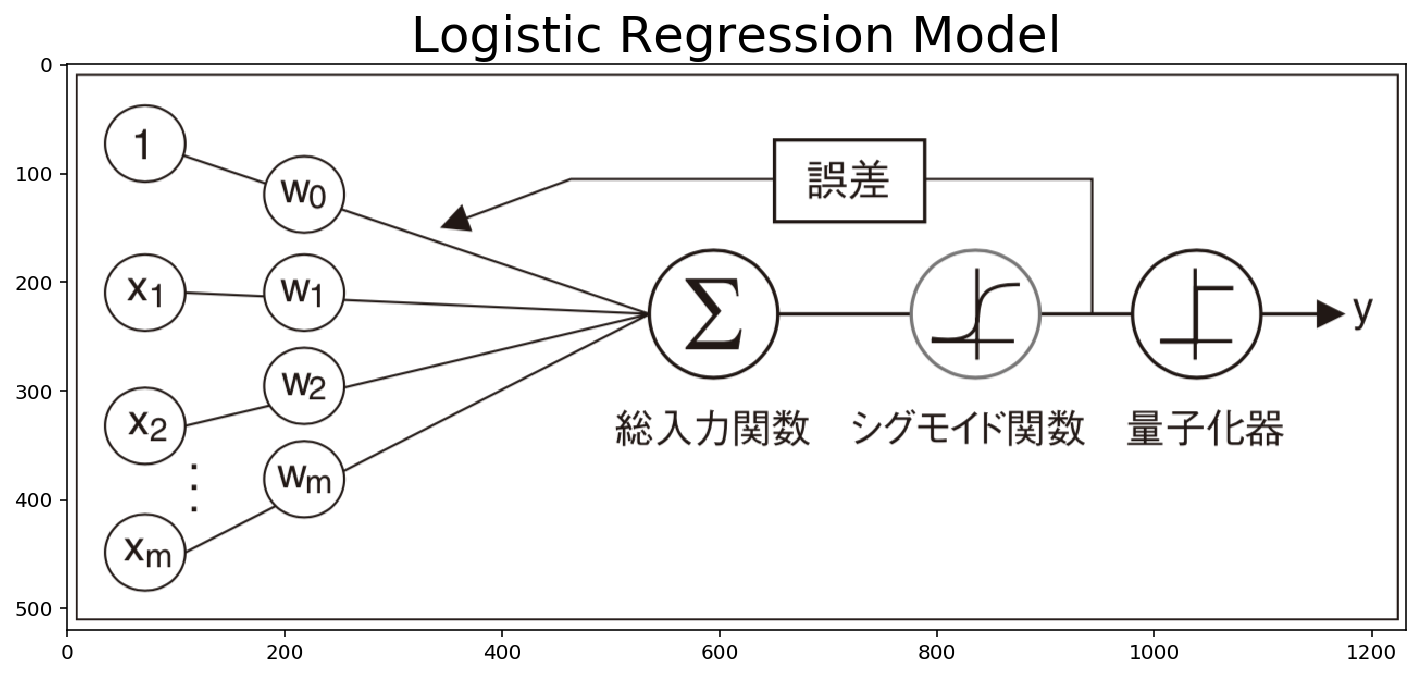

In [66]:
from PIL import Image
im1 = Image.open("./LogisticRegression.png",)

im_list1 = np.asarray(im1)
fig, ax = plt.subplots(figsize=(12, 9))
ax.imshow(im_list1)
plt.title("Logistic Regression Model", fontsize=25) 
plt.show()

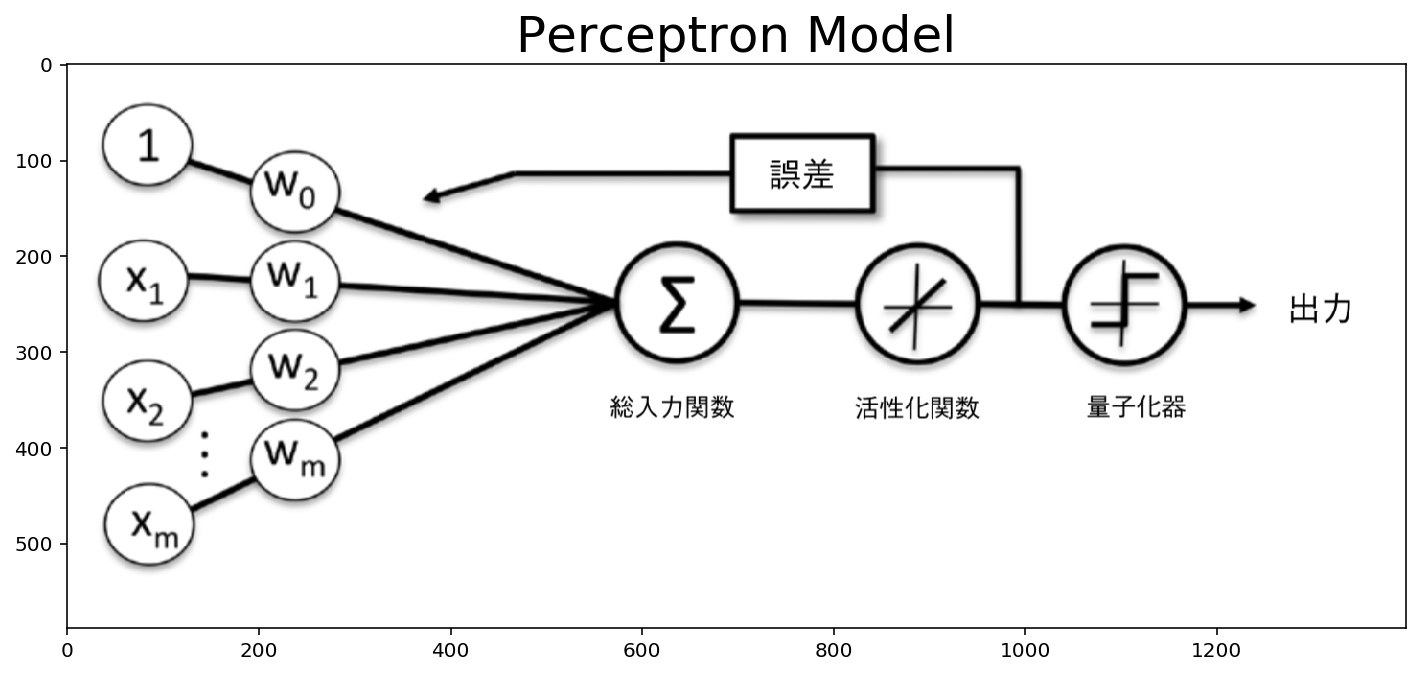

In [68]:
from PIL import Image
im2 = Image.open("./Perceptron.png",)

im_list2 = np.asarray(im2)
fig, ax = plt.subplots(figsize=(12, 9))
ax.imshow(im_list2)
plt.title("Perceptron Model", fontsize=25) 
plt.show()

In [13]:
def sigmoid(z):
    '''シグモイド関数
    z                    -> -∞ から +∞ の実数
    return value -> 0から1.0の間の実数 
    '''
    return 1.0 / (1.0 + np.exp(-z))

シグモイド関数は入力には任意の実数を取り、出力は0から1の間の実数になる。

0から1の間の実数は、確率の値と見做せる。

また、シグモイド関数は 入力値 z = 0 を中心に線対称な図形になる

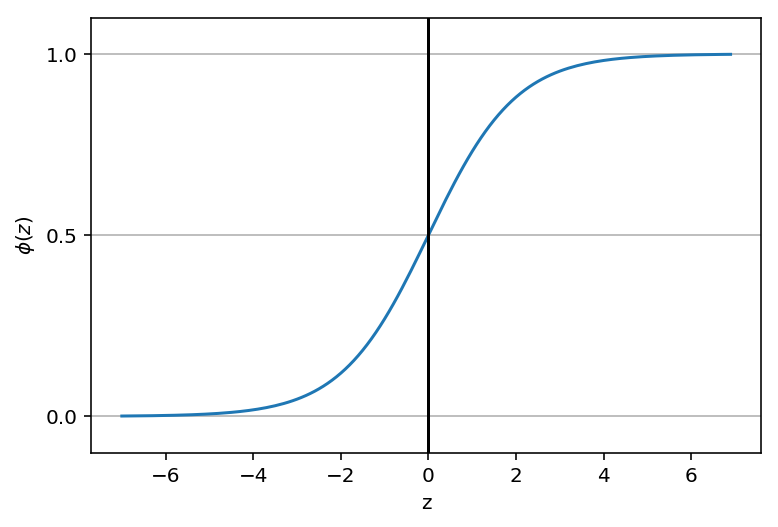

In [14]:
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.show()

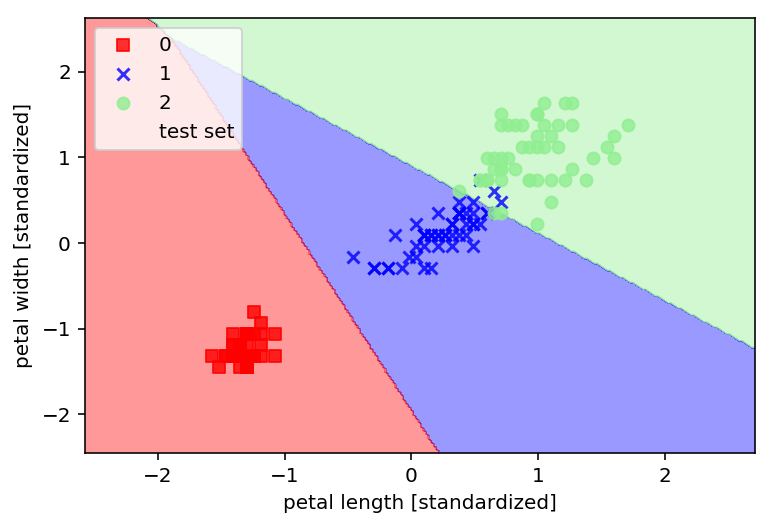

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
plot_desction_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

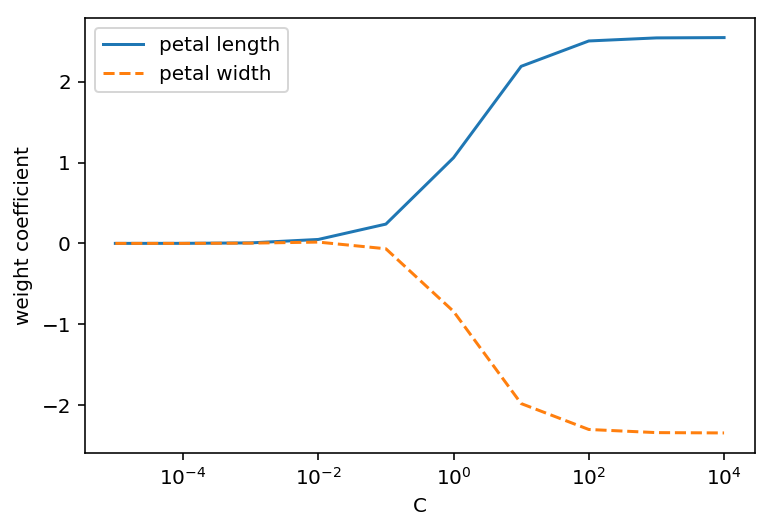

In [16]:
weights, params = [], []
for c in np.arange(-5, 5):
    # 書籍ではC=10**cとなっているが、被べき乗数が整数のときにべき乗数をマイナスにするとエラーになる
    lr = LogisticRegression(C=10.0**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.0**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

### 3.4 サポートベクトルマシン

In [17]:
from sklearn.svm import SVC
# Support Vector Machine なので略語が SVM になりそうなのだけれど SVC
# Support Vector Classifier の略?

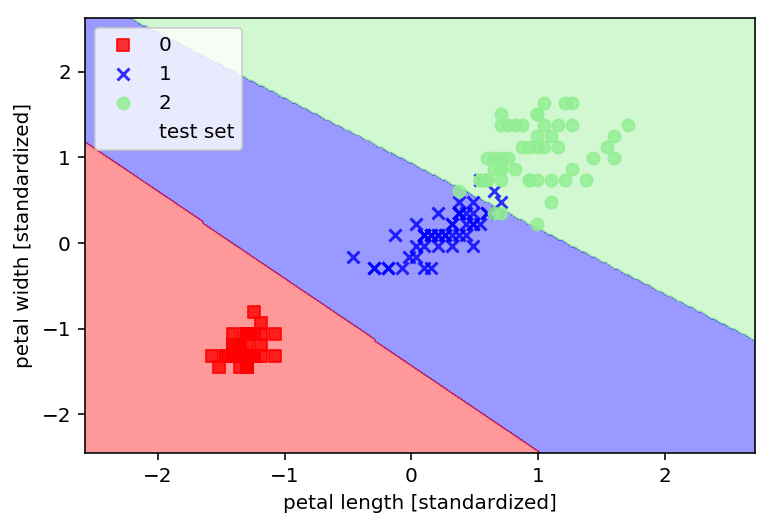

In [18]:
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)
plot_desction_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

### 3.5 カーネルSVMを使った非線形問題の求解

参考
http://shogo82148.github.io/homepage/memo/algorithm/svm/kernel.html

通常のサポートベクタマシンは線形分離可能な問題しか解けない。

がカーネル法というのを導入すると、線形分離不可能な問題も解けるようになる。

カーネル法について調べると必ず出てくる言葉「写像」

「写像」って何? → ほぼ「関数」と同じ。

「関数」って何? → 数学の文脈では「一定の規則で数を別の数に変換するもの」の事。

※プログラミングの分野での「関数」という用語はまた意味が違う。

#### 「関数」の例

f(x) = 2x

xに任意の数値を入れるとそれを2倍する関数。

関数と写像が一緒なら、写像って言葉不要じゃない?

変換する対象が数でないものを含む場合は「写像」と言ったりするらしい。

例えば郵便番号を住所に変換する規則は、ある種の写像。

カーネル法の場合、変換対象がスカラ (単一の数値) ではなくてベクトル (数値の集合) なので関数じゃなくて写像

#### 「線形分離可能」ってなに?

2次元なら、平面上に広がった点の集合を1本の直線で分割できるって事。

3次元なら、空間中に広がった点の集合を1枚の平面で分割できるって事。

4次元以上なら、超空間中に広がった点の集合を1つの超平面で分割できるって事。

一般化すると

N次元空間中に広がった点の集合を1つのN-1次元の超平面で分割可能、という意味。

In [19]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

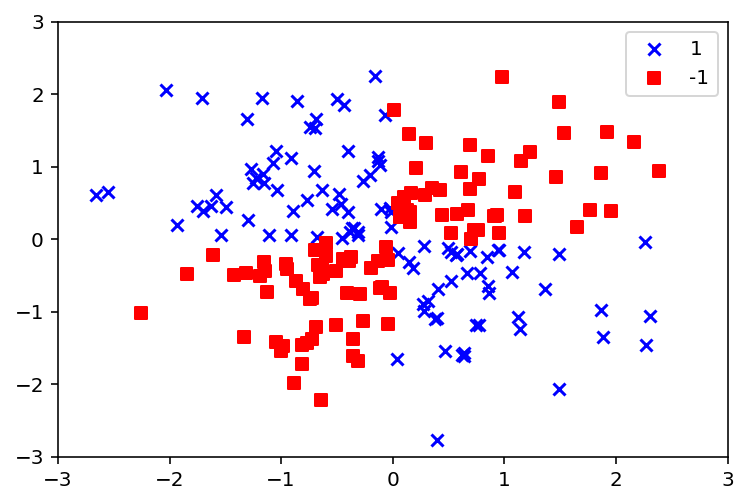

In [20]:
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='best')
plt.show()

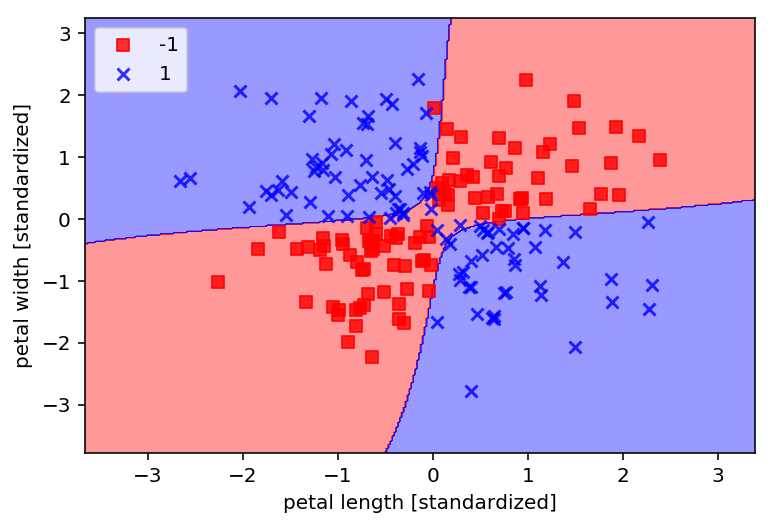

In [21]:
svm = SVC(kernel='rbf', gamma=0.10, C=10.0, random_state=0)
svm.fit(X_xor, y_xor)
plot_desction_regions(X_xor, y_xor, classifier=svm)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

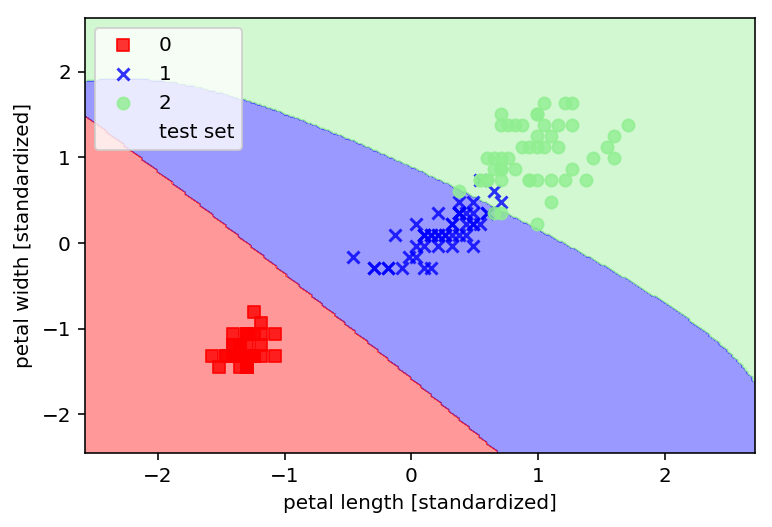

In [22]:
svm = SVC(kernel='rbf', C=1.0, random_state=0, gamma=0.2)
svm.fit(X_train_std, y_train)
plot_desction_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

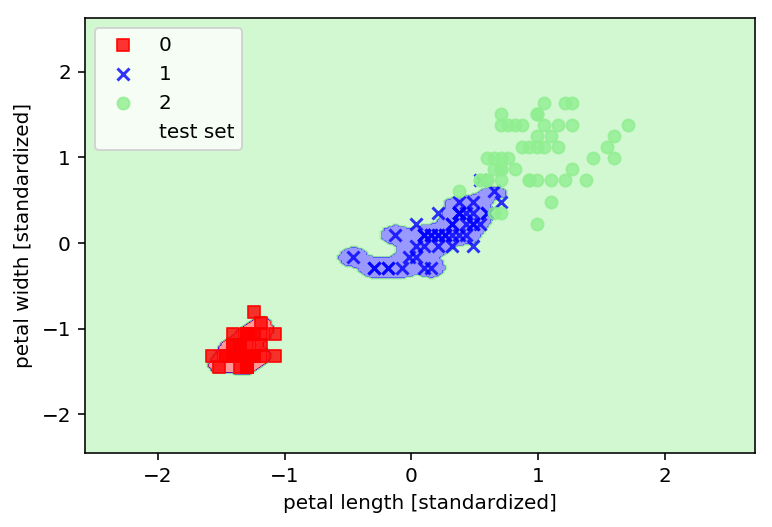

In [23]:
svm = SVC(kernel='rbf', C=1.0, random_state=0, gamma=100.0)
svm.fit(X_train_std, y_train)
plot_desction_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [24]:
def gini(p):
    return (p) * (1- (p)) + (1 - p)*(1- (1-p))


In [25]:
def entropy(p):
    return - p*np.log2(p) - (1 -p)*np.log2((1-p))

In [26]:
def error(p):
    return 1 - np.max([p, 1-p])


In [27]:
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p !=0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

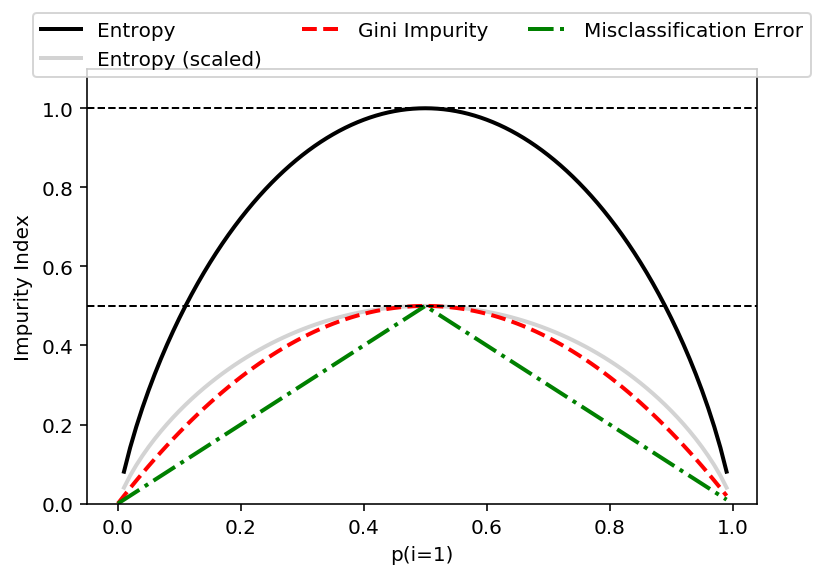

In [28]:
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
    
ax.legend(loc='upper center', bbox_to_anchor=(0.5,1.15),ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

### 3.6 決定木

In [29]:
# 3.6.2 決定木の構築
from sklearn.tree import DecisionTreeClassifier

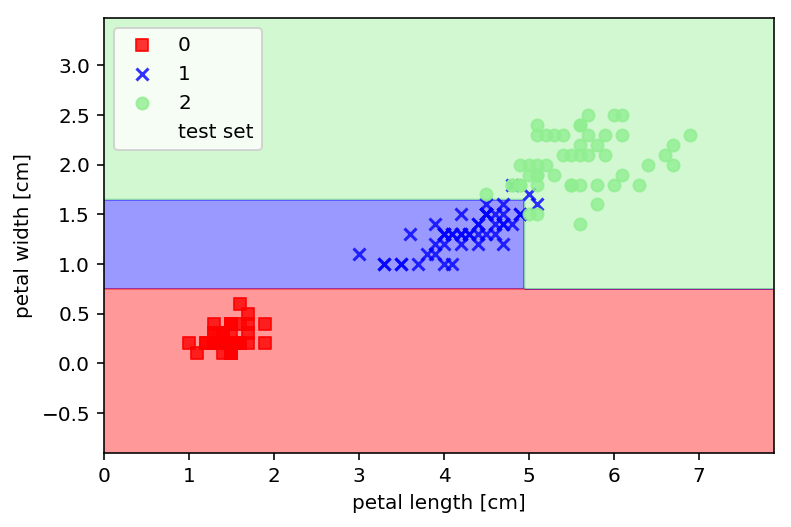

In [30]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_desction_regions(X_combined, y_combined, classifier=tree, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

In [31]:
from sklearn.tree import export_graphviz

In [41]:
export_graphviz(tree, out_file='tree.dot', feature_names=['petal length', 'petal width'])
# jupyter上で、先頭に「!」マークをつけるとシェルを実行してくれる
!test -f tree.png || dot -Tpng tree.dot -o tree.png
!ls

Ch03.ipynb  CoinGame01.ipynb  tree.dot	tree.png


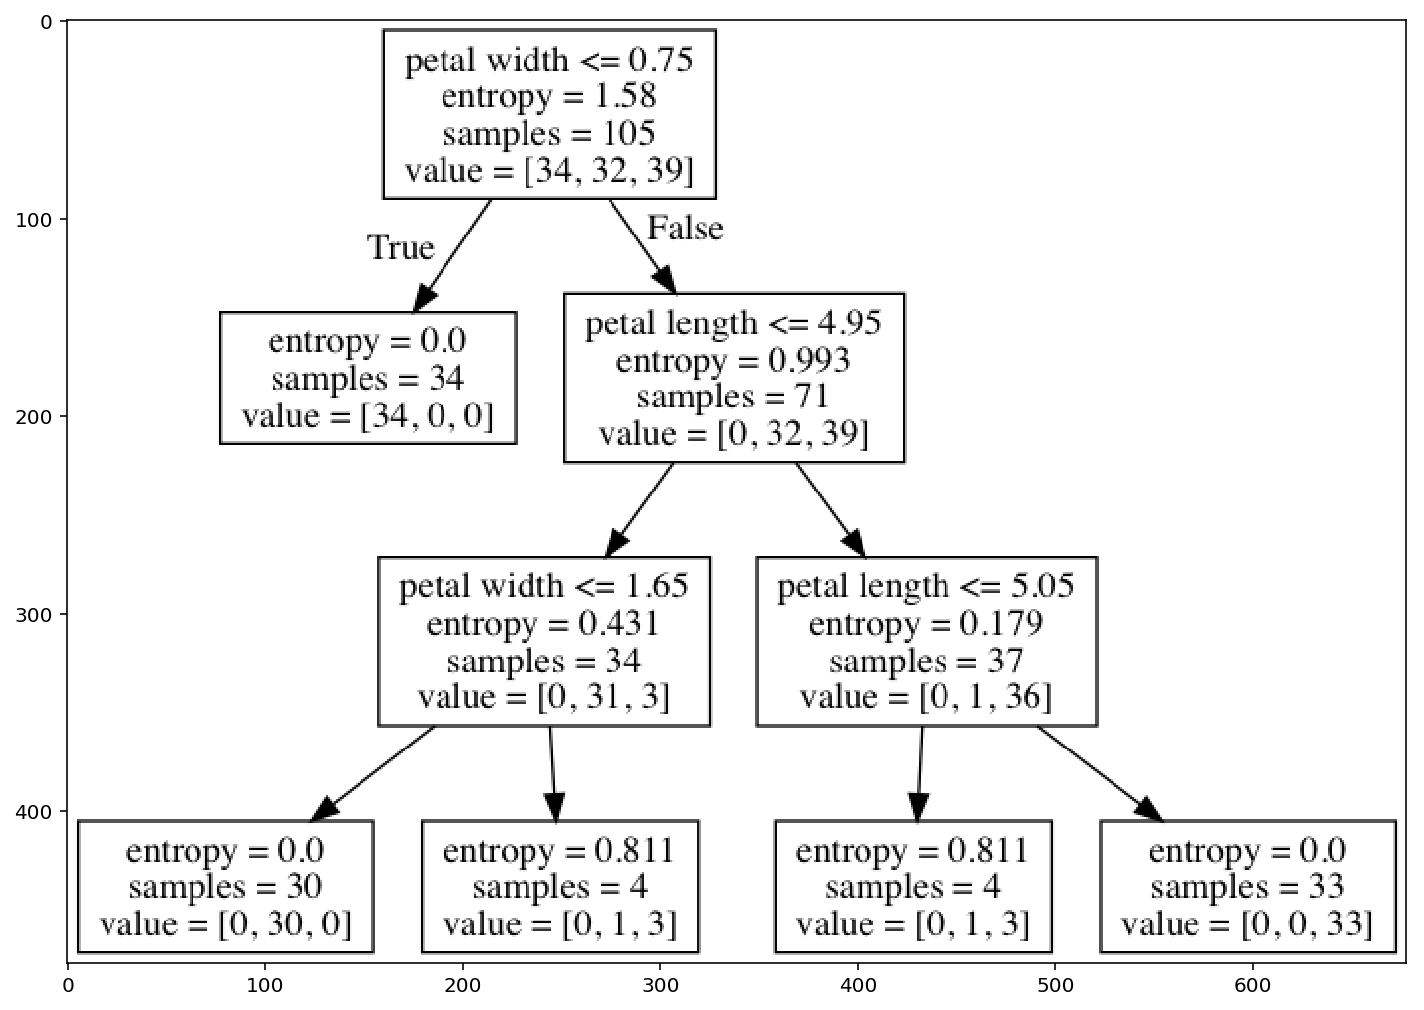

In [43]:
from PIL import Image
im = Image.open("./tree.png",)

im_list = np.asarray(im)
fig, ax = plt.subplots(figsize=(12, 9))
ax.imshow(im_list)
plt.show()

### 3.6.3 ランダムフォレスト

In [34]:
# 3.6.3 ランダムフォレストを使って弱い学習アルゴリズムと強い学習アルゴリズムを結合する
from sklearn.ensemble import RandomForestClassifier

In [35]:
forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1, n_jobs=2)

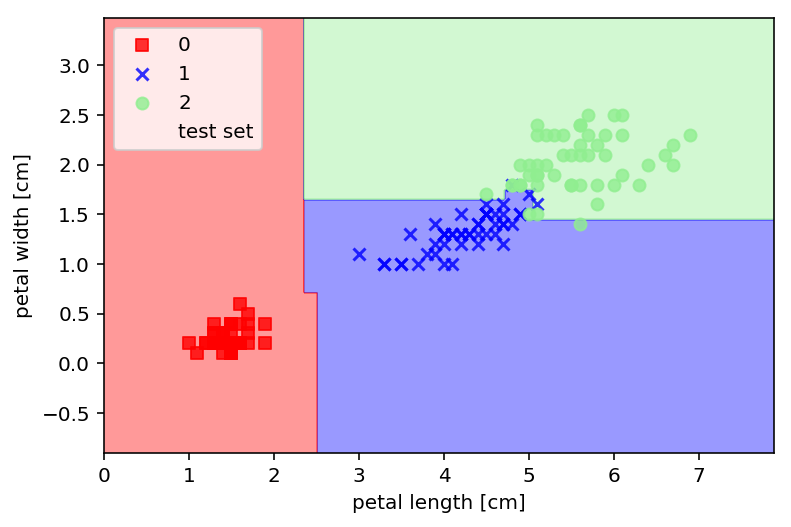

In [36]:
forest.fit(X_train, y_train)
plot_desction_regions(X_combined, y_combined, classifier=forest, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

### 3.7 k 近傍法 (k-nearest neighbor: KNN)

In [37]:
# 3.7 k近傍法: 怠惰学習アルゴリズム
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

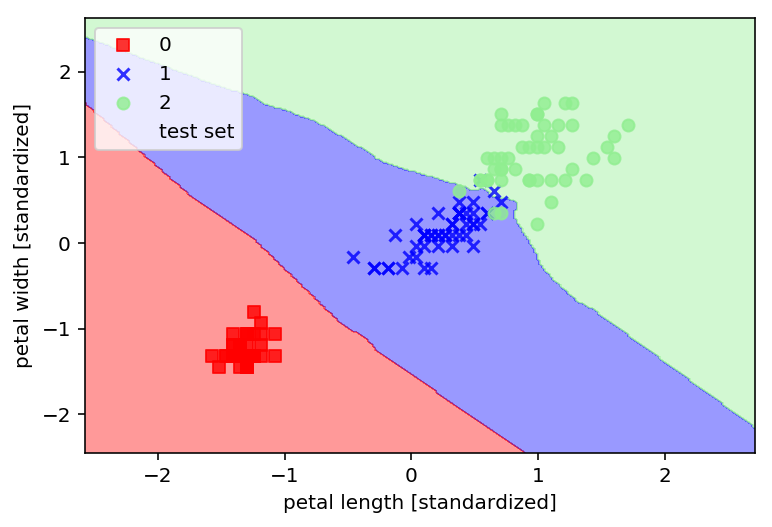

In [39]:
knn.fit(X_train_std, y_train)
plot_desction_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

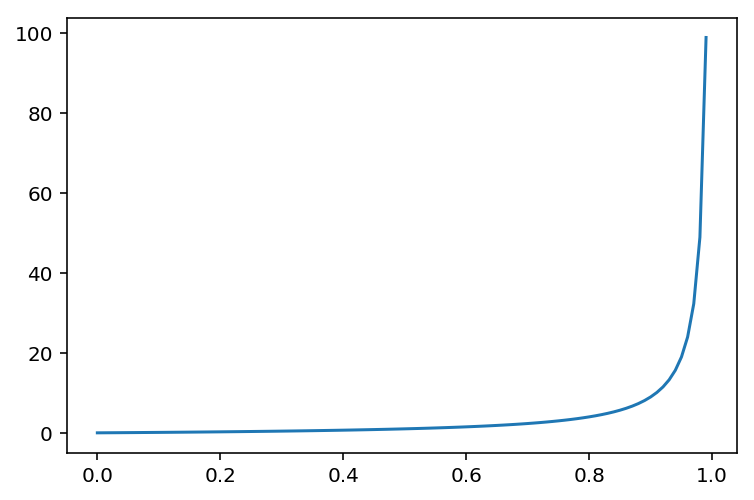

In [56]:
# 復習用
p = np.linspace(0,1,100, endpoint=False)
odds = p / (1-p)
plt.plot(p, odds)
plt.show()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


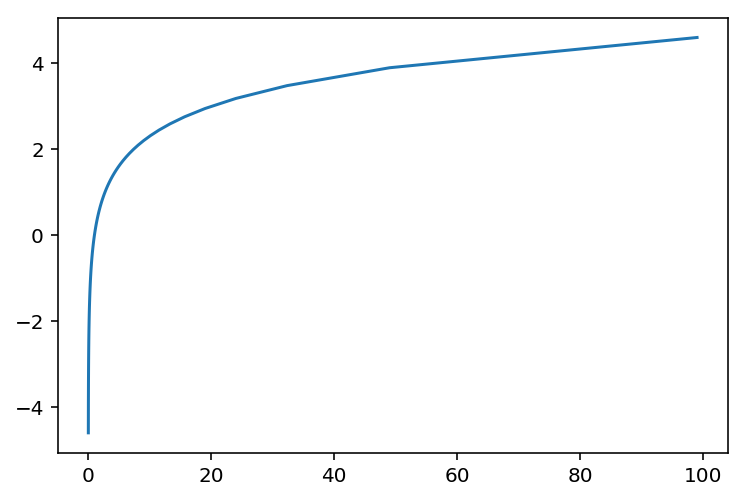

In [57]:
plt.plot(odds, np.log(odds))
plt.show()

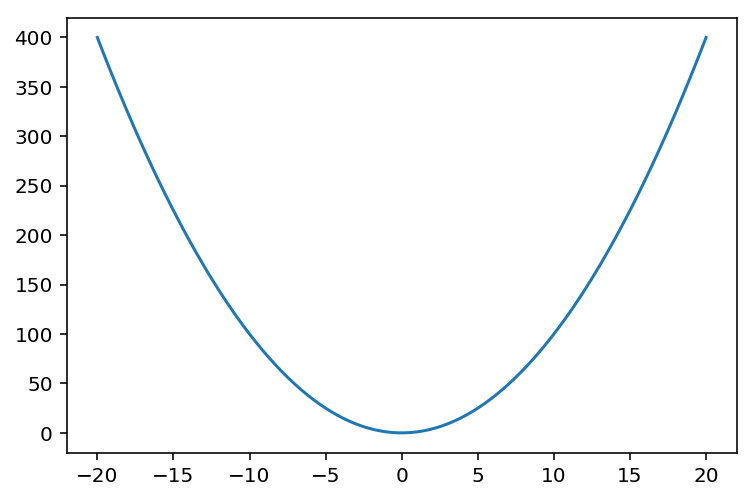

In [74]:
x = np.linspace(-20, 20, 100)
y = x**2 
plt.plot(x,y)
plt.show()

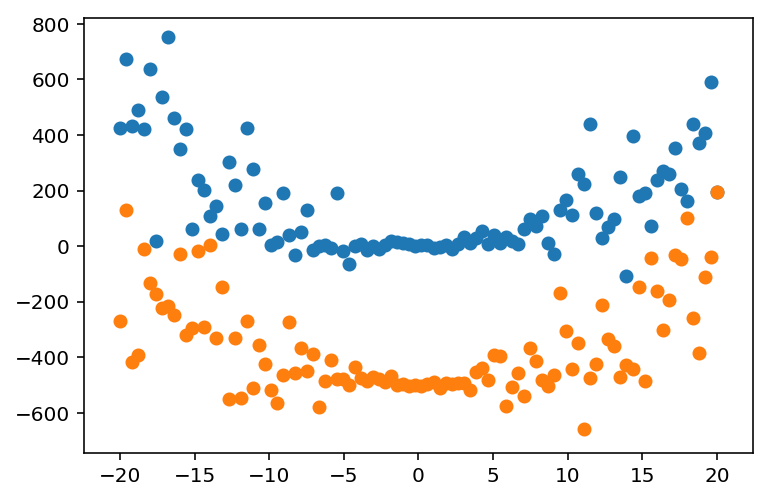

In [92]:
from numpy.random import *
x1 = np.linspace(-20, 20, 100)
y1 = (x1**2) + randn(100)*10*x1
y2 = (x1**2) - randn(100)*10*x1 - 500
plt.scatter(x1,y1)
plt.scatter(x1,y2)
plt.show()


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


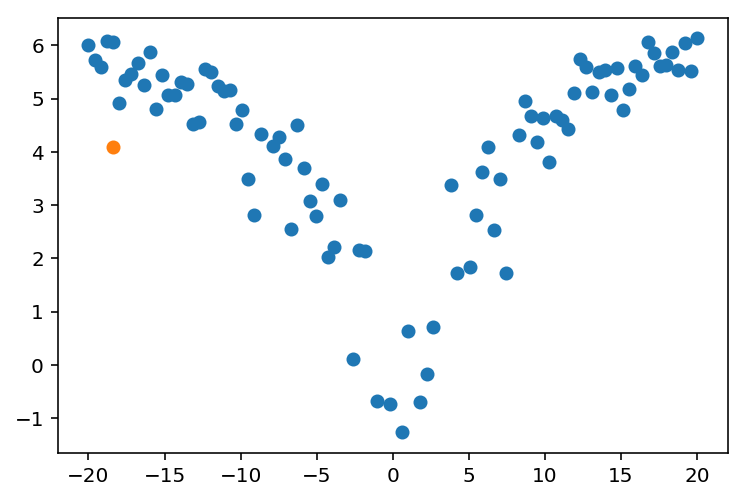

In [104]:
from numpy.random import *
x1 = np.linspace(-20, 20, 100)
y1 = (x1**2) + randn(100)*5*x1
y2 = (x1**2) - randn(100)*5*x1 -500
plt.scatter(x1,np.log(y1))
plt.scatter(x1,np.log(y2))
plt.show()

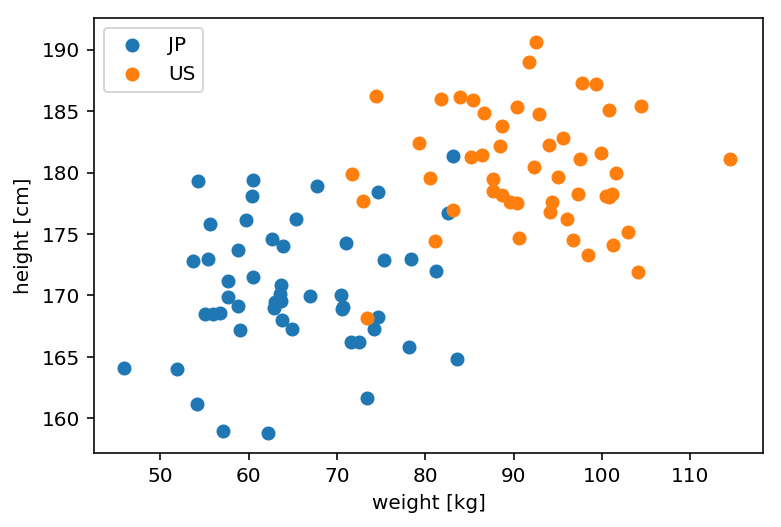

In [136]:
# 日本人男の平均身長 170cm、平均体重65kg
# アメリカ人男の平均身長 180cm、平均体重90kg、と過程
# 身長の標準偏差は5、体重は10とする
h_jp = normal(170,5,50)
w_jp = normal(65, 10, 50)
h_us = normal(180, 5, 50)
w_us = normal(90, 10, 50)
#fig = plt.figure(figsize=(5,3),dpi=200)
plt.scatter(w_jp, h_jp, label="JP")
plt.scatter(w_us, h_us, label="US")
plt.xlabel('weight [kg]')
plt.ylabel('height [cm]')
plt.legend(loc='upper left')
plt.show()

In [154]:
# トレーニングデータの作成は以下を参考にやってみる
# https://pythondatascience.plavox.info/scikit-learn/%E3%83%88%E3%83%AC%E3%83%BC%E3%83%8B%E3%83%B3%E3%82%B0%E3%83%87%E3%83%BC%E3%82%BF%E3%81%A8%E3%83%86%E3%82%B9%E3%83%88%E3%83%87%E3%83%BC%E3%82%BF

X_train1 = np.vstack((w_jp, w_us))
y_train1 = np.hstack((h_jp, h_us))
X_test1 = np.vstack((normal(65, 10, 50), normal(90, 10, 50)))
y_test1 = np.hstack((normal(170,5,50),normal(180,5,50)))
print(X_test1.shape, X_train1.shape, y_train1.shape)
sc = StandardScaler()
sc.fit(X_train1)
X_train_std1 = sc.transform(X_train1)
X_test_std1 = sc.transform(X_test1)

svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std1, y_train1)

(2, 50) (2, 50) (100,)


ValueError: Found input variables with inconsistent numbers of samples: [2, 100]

In [135]:
print(X_train1.shape, y_train1.shape, X_test1.shape, y_test1.shape, X_train_std1.shape, X_test_std1.shape)

(2, 105) (210,) (2, 45) (90,) (2, 105) (2, 100)
